# Image Quality Assessment - GIQA

## Data Based Methods
- Similarity Between Real and Generated images indicate quality

- GIQA --> Density Estimation Problem for Real images

### GMM

- We adopt Gaussian Mixture Model as a parametric method  to capture the probability distribution of real data, then we estimate the probability of a generated image as the quality score

- Model the probability distribution of the real data then we can estimate the quality of a generated image by the estimated probability from the model.



In [1]:
import os, sys, inspect, pickle 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import mixture
from models import write_act, gmm_score, get_gmm

In [3]:
currentdir = os.path.abspath(os.getcwd())
parentdir = os.path.dirname(currentdir)

#Define here where the data and results are stored
datadir=os.path.join(parentdir,"data")
resultdir=os.path.join(parentdir,'results',"GMM_BMW")

In [10]:
def compute_gmm(dataset_path, act_path, pca_path, gmm_path, test_path, output_file, bmw_inception=False,batch_size=20,gpu = ''):
    pca_rate = 0.95
    dims = 2048
    kernel_number = 70

    write_act.calculate_fid_given_paths(dataset_path, batch_size, gpu != '', dims, pca_path, pca_rate, act_path,bmw_inception)
    act = pickle.load(open(act_path, "rb"))
    gact = mixture.GaussianMixture(n_components=kernel_number, covariance_type='full')
    gact.fit(act)
    pickle.dump(gact,open(gmm_path, "wb+"))
    gmm_score.calculate_fid_given_paths(test_path, batch_size, gpu != '', dims, pca_path, gmm_path, output_file)
    
def chunker(seq, size):
    return (seq[pos:pos + size] for pos in range(0, len(seq), size))

def print_minmax_imgs(res_path, test_path, model):
    

    imgs, vals = [], []

    with open(res_path) as f:
        for f_path, val in chunker(f.readlines(), 2):
            imgs.append(f_path[9:-5])
            vals.append(float(val))
            
    vals = np.array(vals)
    #print(vals)
    #vals = np.exp(vals)
    #print(vals)

    min_idx, max_idx = vals.argmin(), vals.argmax()

    fig = plt.figure()
    ax = fig.add_subplot(2, 1, 1)
    #imgplot = plt.imshow(mpimg.imread(test_path + '/' + imgs[min_idx]))
    imgplot = plt.imshow(mpimg.imread(imgs[min_idx]))

    ax.set_title("For model {} minimum value image with score {}".format(model,  vals[min_idx]))

    ax = fig.add_subplot(2, 1, 2)
    #imgplot = plt.imshow(mpimg.imread(test_path + '/' + imgs[max_idx]))
    imgplot = plt.imshow(mpimg.imread(imgs[max_idx]))

    ax.set_title("For model {} maximum value image with score {}".format(model, vals[max_idx]))
    fig.tight_layout()
    plt.show()


### Standard Inception Model

  0%|          | 0/289 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 289/289 [00:10<00:00, 26.29it/s]


(1445, 2048)
pca n components is 
114


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:03<00:00,  3.50it/s]


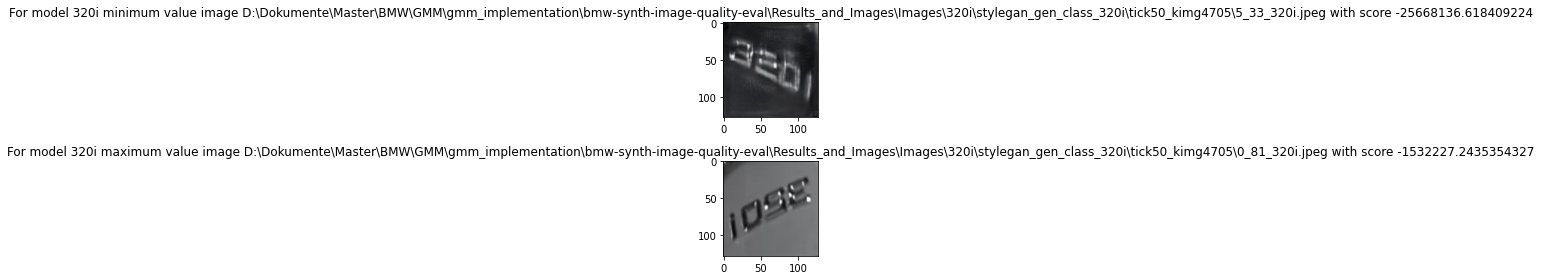

  1%|▏         | 3/235 [00:00<00:09, 25.42it/s]

loaded Standard Inception successfully


100%|██████████| 235/235 [00:09<00:00, 25.59it/s]


(1175, 2048)
pca n components is 
136


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:07<00:00,  1.60it/s]


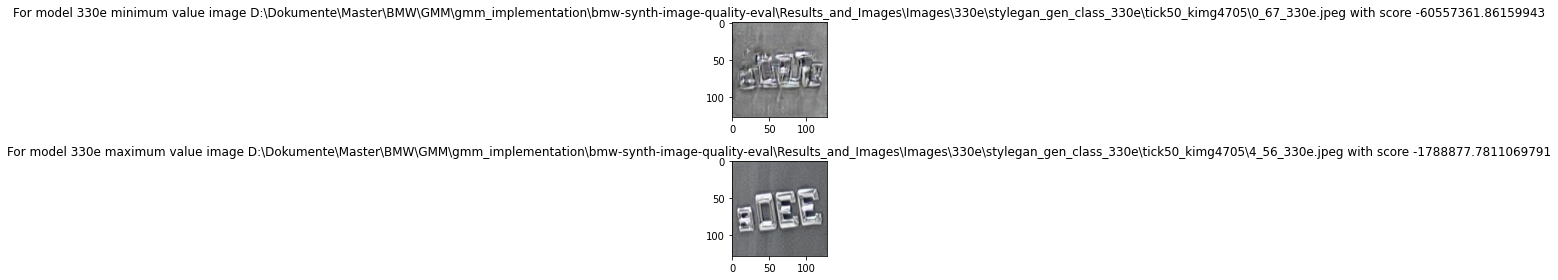

  1%|          | 3/295 [00:00<00:10, 27.27it/s]

loaded Standard Inception successfully


100%|██████████| 295/295 [00:10<00:00, 27.34it/s]


(1475, 2048)
pca n components is 
177


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:07<00:00,  1.54it/s]


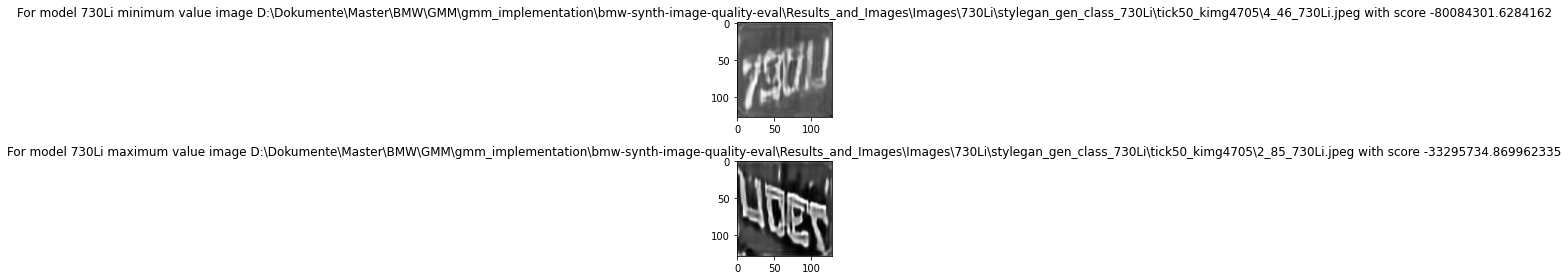

  1%|          | 3/384 [00:00<00:13, 27.52it/s]

loaded Standard Inception successfully


100%|██████████| 384/384 [00:13<00:00, 27.48it/s]


(1920, 2048)
pca n components is 
190


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:07<00:00,  1.71it/s]


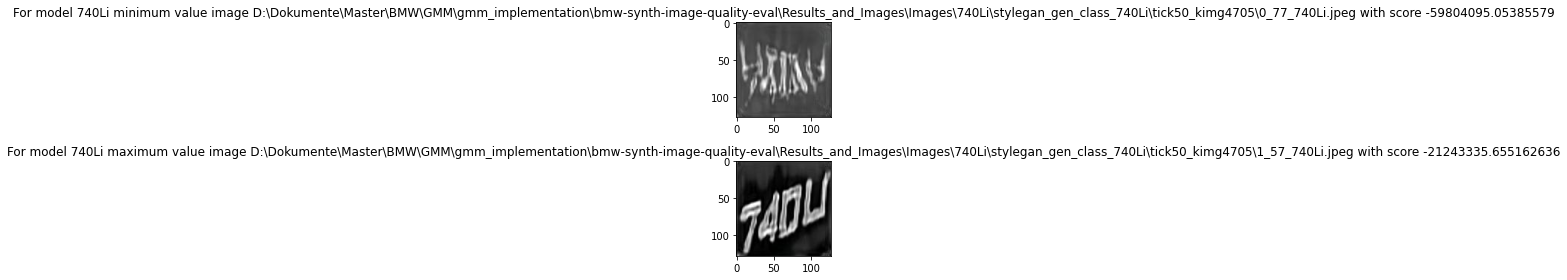

In [8]:
models = ['320i','330e', '730Li', '740Li']

for model in models:
    dataset_path = [os.path.join(datadir,f"{model}",f"model_inscription_{model}")]

    result_path=os.path.join(resultdir, 'gmm_res', f'{model}')

    act_path = os.path.join(result_path,f'act_{model}')
    pca_path = os.path.join(result_path,f'pca_{model}')
    gmm_path = os.path.join(result_path,f'gmm_{model}')
    output_file = os.path.join(result_path,f'{model}tick50.txt')

    test_path = [os.path.join(datadir,f"{model}",f"stylegan_gen_class_{model}",'tick50_kimg4705')]

    compute_gmm(dataset_path, act_path, pca_path, gmm_path, test_path, output_file,batch_size=5,gpu="cuda:0")
    print("Model class: ", model)
    print_minmax_imgs(output_file, test_path[0], model)


##### The value of the score is meaningless, but we can use the rank of score to compare which has a higher quality. For different GMM models (especially different kernels), the score has a very large range (probably from -10^7 to 10^5). It's normal since we do not directly need the value

### Tuned BMW Inception Model

Model class:  320i


  1%|          | 3/289 [00:00<00:10, 26.10it/s]

Loaded BMW Inception succesfully


100%|██████████| 289/289 [00:11<00:00, 26.12it/s]


(1445, 2048)
pca n components is 
5


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:03<00:00,  3.77it/s]


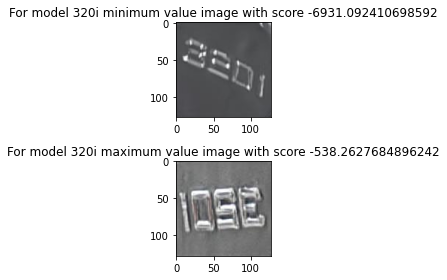

Model class:  330e


  1%|▏         | 3/235 [00:00<00:09, 25.00it/s]

Loaded BMW Inception succesfully


100%|██████████| 235/235 [00:09<00:00, 25.59it/s]


(1175, 2048)
pca n components is 
29


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:03<00:00,  3.78it/s]


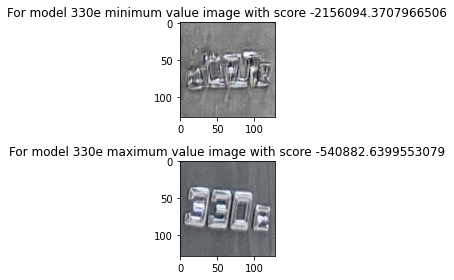

Model class:  730Li


  1%|          | 3/295 [00:00<00:10, 27.53it/s]

Loaded BMW Inception succesfully


100%|██████████| 295/295 [00:10<00:00, 27.51it/s]


(1475, 2048)
pca n components is 
1


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:03<00:00,  3.80it/s]


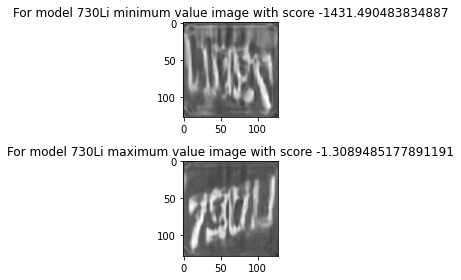

Model class:  740Li


  1%|          | 3/384 [00:00<00:13, 27.52it/s]

Loaded BMW Inception succesfully


100%|██████████| 384/384 [00:13<00:00, 27.54it/s]


(1920, 2048)
pca n components is 
2


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:03<00:00,  3.79it/s]


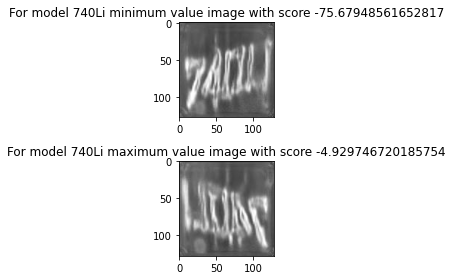

In [12]:
models = ['320i','330e', '730Li', '740Li']

for model in models:
    #path to load data from
    dataset_path = [os.path.join(datadir,f"{model}",f"model_inscription_{model}")]

    #paths to store result of gmm's
    result_path=os.path.join(resultdir,'gmm_res_bmw',f'{model}')
    act_path = os.path.join(result_path,f'act_{model}')
    pca_path = os.path.join(result_path,f'pca_{model}')
    gmm_path = os.path.join(result_path,f'gmm_{model}')
    output_file = os.path.join(result_path,f'{model}tick50.txt')

    test_path = [os.path.join(datadir,f"{model}",f"stylegan_gen_class_{model}",'tick50_kimg4705')]

    print("Model class: ", model)
    compute_gmm(dataset_path, act_path, pca_path, gmm_path, test_path, output_file,bmw_inception=True,batch_size=5,gpu="cuda:0")
    print_minmax_imgs(output_file, test_path[0], model)

Model class:  320i


  1%|          | 3/289 [00:00<00:11, 25.00it/s]

Loaded BMW Inception succesfully


100%|██████████| 289/289 [00:11<00:00, 26.09it/s]


(1445, 2048)
pca n components is 
5


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:03<00:00,  3.76it/s]


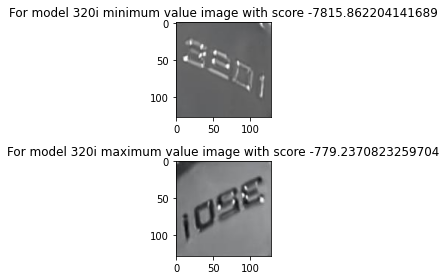

Model class:  330e


  0%|          | 0/235 [00:00<?, ?it/s]

Loaded BMW Inception succesfully


100%|██████████| 235/235 [00:09<00:00, 25.40it/s]


(1175, 2048)
pca n components is 
29


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:03<00:00,  3.76it/s]


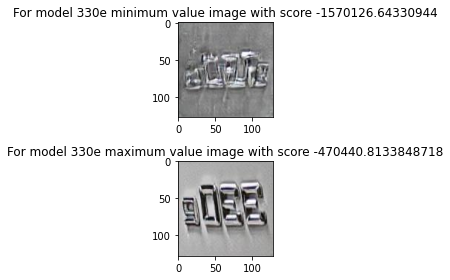

Model class:  730Li


  1%|          | 3/295 [00:00<00:10, 27.52it/s]

Loaded BMW Inception succesfully


100%|██████████| 295/295 [00:10<00:00, 27.35it/s]


(1475, 2048)
pca n components is 
1


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:03<00:00,  3.78it/s]


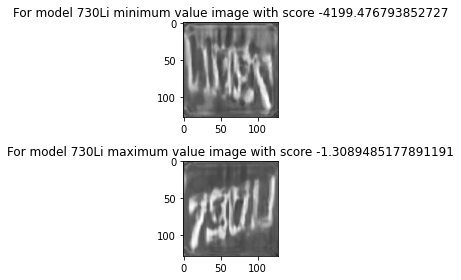

Model class:  740Li


  1%|          | 3/384 [00:00<00:13, 27.52it/s]

Loaded BMW Inception succesfully


100%|██████████| 384/384 [00:14<00:00, 27.37it/s]


(1920, 2048)
pca n components is 
2


  0%|          | 0/12 [00:00<?, ?it/s]

loaded Standard Inception successfully


100%|██████████| 12/12 [00:03<00:00,  3.78it/s]


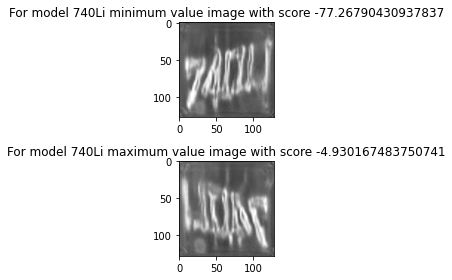

In [11]:
models = ['320i','330e', '730Li', '740Li']

for model in models:
    #path to load data from
    dataset_path = [os.path.join(datadir,f"{model}",f"model_inscription_{model}")]

    #paths to store result of gmm's
    result_path=os.path.join(resultdir,'gmm_res_bmw',f'{model}')
    act_path = os.path.join(result_path,f'act_{model}')
    pca_path = os.path.join(result_path,f'pca_{model}')
    gmm_path = os.path.join(result_path,f'gmm_{model}')
    output_file = os.path.join(result_path,f'{model}tick50.txt')

    test_path = [os.path.join(datadir,f"{model}",f"stylegan_gen_class_{model}",'tick50_kimg4705')]

    print("Model class: ", model)
    compute_gmm(dataset_path, act_path, pca_path, gmm_path, test_path, output_file,bmw_inception=True,batch_size=5,gpu="cuda:0")
    print_minmax_imgs(output_file, test_path[0], model)